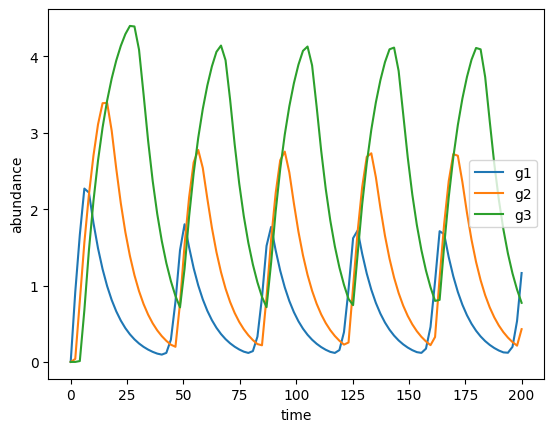

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

y0 = [0,0,0]

#timepoint
t = np.linspace(0,200,num=100) #num = 100 time points

#params
k_1 = 0.5
gamma_1 = 0.1 #good simulation if gamma_1 < k_1
k_2 = 0.5
gamma_2 = 0.1 #good simulation if gamma_2 < k_2
k_3 = 0.5
gamma_3 = 0.1 #good simulation if gamma_3 < k_3
c = 1
n = 9

params = [k_1, gamma_1, k_2, gamma_2, k_3, gamma_3, c, n]

def sim(variables, t, params):
    g1 = variables[0]
    g2 = variables[1]
    g3 = variables[2]

    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    k_3 = params[4]
    gamma_3 = params[5]
    c = params[6]
    n = params[7]

    dg1dt = (c**n/(c**n+g3**n))*k_1 - gamma_1*g1
    dg2dt = (g1**n/(c**n + g1**n))*k_2 - gamma_2*g2 
    dg3dt = (g2**n/(c**n + g2**n))*k_3 - gamma_3*g3

    return [dg1dt, dg2dt, dg3dt]


y = odeint(sim, y0, t, args=(params,))

#plot
plt.plot(t,y[:,0],label="g1")
plt.plot(t,y[:,1],label="g2")
plt.plot(t,y[:,2],label="g3")
plt.xlabel("time")
plt.ylabel("abundance")
plt.legend()
plt.show()